# 2번 분류기 학습

#1. 정규화된 CIFAR-10 훈련집합과 테스트 집합을 torchvision을 이용하여 적재함

(1) 화면 출력 확인

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# 훈련집합의 일부사진들 확인
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#functions to show image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [5]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

(2) 화면 출력 확인

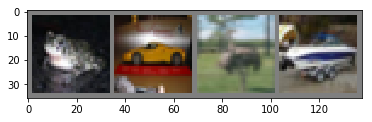

In [6]:
# show images
imshow(torchvision.utils.make_grid(images))

In [7]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

 frog   car  bird  ship


#2. 컨볼루션 신경망을 정의함

3채널 21*21 크기의 사진을 입력받고 신경망을 통과해 10 부류를 수행

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):      
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))    
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

#3. 손실함수 정의, 교차 엔트로피와 SGD+momentum

In [10]:
import torch.optim as optim

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

(3) 화면 출력 확인

#4. 훈련집합을 이용하여 신경망을 학습시킴

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  1000] loss: 2.299
[1,  2000] loss: 2.132
[1,  3000] loss: 1.941
[1,  4000] loss: 1.794
[1,  5000] loss: 1.719
[1,  6000] loss: 1.651
[1,  7000] loss: 1.617
[1,  8000] loss: 1.582
[1,  9000] loss: 1.571
[1, 10000] loss: 1.529
[1, 11000] loss: 1.515
[1, 12000] loss: 1.487
[2,  1000] loss: 1.428
[2,  2000] loss: 1.415
[2,  3000] loss: 1.404
[2,  4000] loss: 1.375
[2,  5000] loss: 1.375
[2,  6000] loss: 1.357
[2,  7000] loss: 1.357
[2,  8000] loss: 1.347
[2,  9000] loss: 1.323
[2, 10000] loss: 1.325
[2, 11000] loss: 1.308
[2, 12000] loss: 1.276
Finished Training


#5. 테스트집합을 이용하여 신경망 성능 확인

In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

(4) 화면 출력 확인

GroundTruth:    cat  ship  ship plane


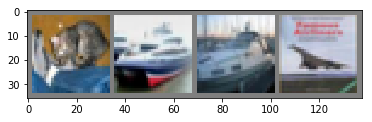

In [15]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

(5) 화면 출력 확인

In [16]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat plane  ship plane


(6) 화면 출력확인 및 일반화 성능 서술

In [17]:
#performance on the whole test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


(7) 화면 출력 확인 및 부류별 분류기의 성능 서술

In [18]:
#performance on each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 75 %
Accuracy of  bird : 36 %
Accuracy of   cat : 30 %
Accuracy of  deer : 56 %
Accuracy of   dog : 46 %
Accuracy of  frog : 46 %
Accuracy of horse : 68 %
Accuracy of  ship : 52 %
Accuracy of truck : 57 %
